In [4]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
%matplotlib inline

<h1> Rolling Windows</h1><br>

In [5]:
#Reading market data for General Electric
df = pd.read_excel('../../Data/GE.xlsx')

Create Rolling window of 50 days to calculate the difference between the highest and lowest closing price<br>
The function is applied on the data as if the data was a Series-object. If you specify raw=True, the data in the window is considered a numpy array

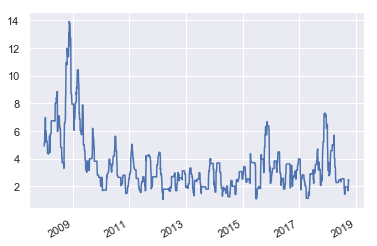

In [6]:
df['disp']=df['GE'].rolling(window=50).apply(lambda x: np.max(x)-np.min(x))
df['disp'].plot();

Calculate 5 Day Rolling Volatlity

In [7]:
df['Ret'] = df['GE'].pct_change(periods=1)
df['Vol']= df['Ret'].rolling(window=5).apply(lambda x : np.std(x)*np.sqrt(250)*100,raw=True)
df['Vol'].plot();


TypeError: apply() got an unexpected keyword argument 'raw'

Calculating a 1 yr drawdown now becomes easy

In [ ]:
df['Drawdown']=df['GE'].rolling(window=250).apply(lambda x : x[-1]-np.max(x),raw=True)
df['Drawdown'].plot()                                                   ;